In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

### 7 fold cross validation

In [53]:
BIO = [0.0494326480170767, 0.921428571428571, 0.537305421363392, 0.987179487179487, 0.959444444444444, 0.712893659087699, 1]
BIO_EEG = [0.575666, 0.945238, 0.878422, 0.983761, 0.961667, 0.809702, 1.000000]
EEG = [0.72636815920398, 0.501041666666666, 0.651128139633886, 0.649166666666666, 0.367326732673267, 0.524648547328959, 0.208942836393816]

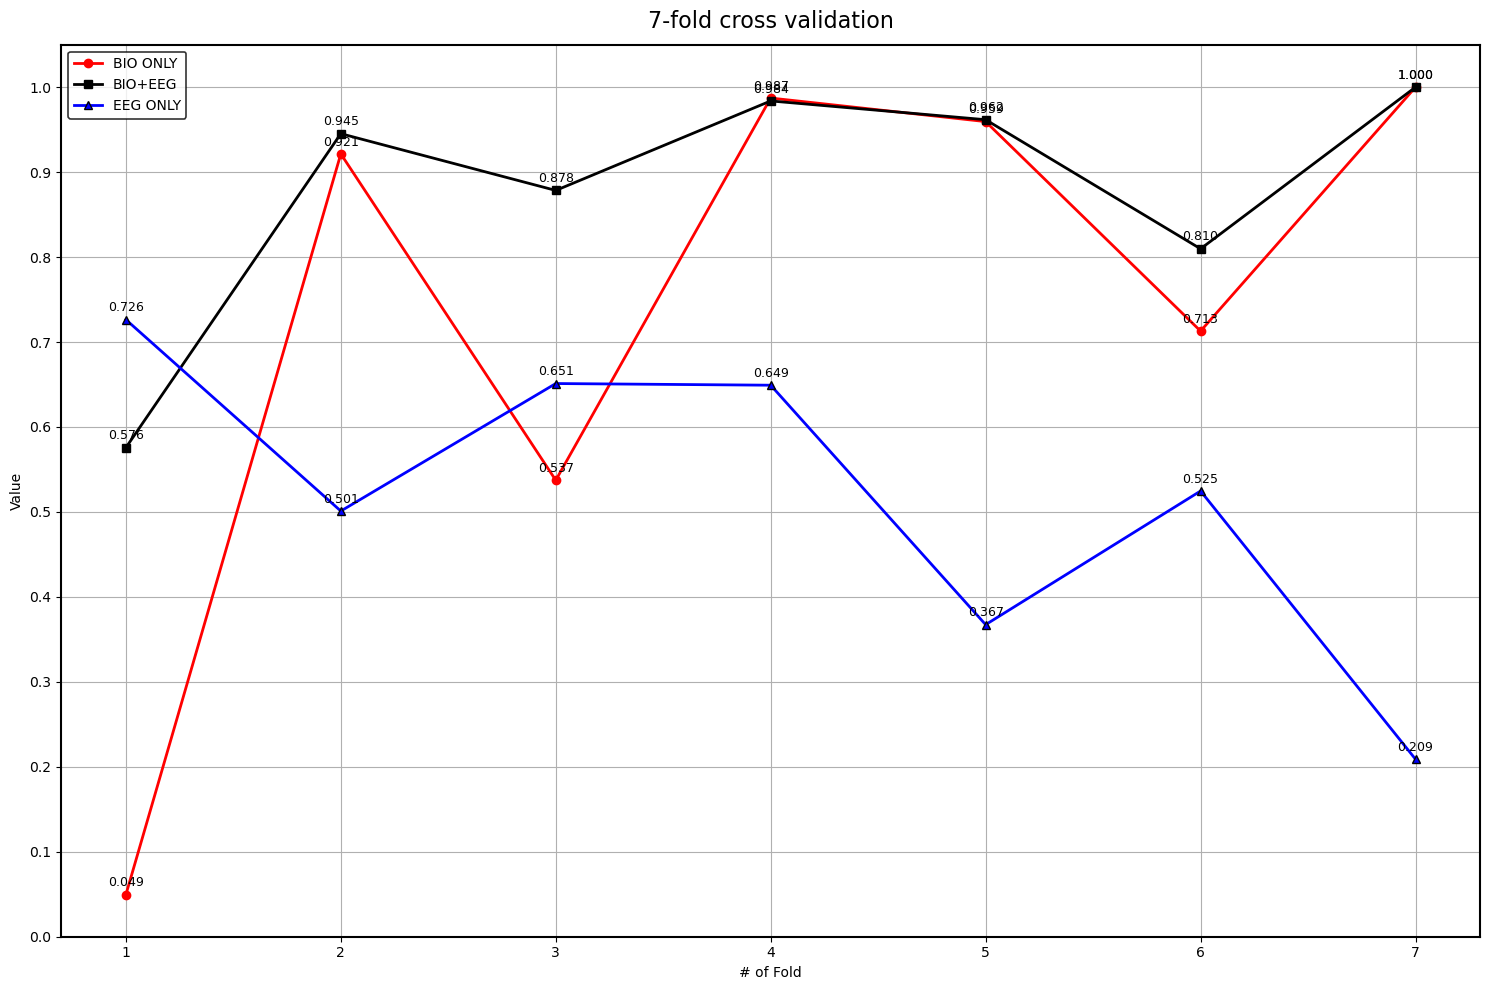

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


folds = np.arange(1, len(BIO) + 1)

plt.figure(figsize=(15, 10))
ax = plt.gca()

# --- plot with matplotlib only ---
# --- plot with specified colors ---
line1, = ax.plot(folds, BIO,      color='red',   marker='o', linewidth=2, label='BIO ONLY',
                  markerfacecolor='red', markeredgecolor='red')
line2, = ax.plot(folds, BIO_EEG,  color='black', marker='s', linewidth=2, label='BIO+EEG',
                  markerfacecolor='black', markeredgecolor='black')
line3, = ax.plot(folds, EEG,      color='blue',  marker='^', linewidth=2, label='EEG ONLY',
                  markerfacecolor='blue', markeredgecolor='black')

# --- annotate each point with its value ---
def annotate_points(x, y):
    for xi, yi in zip(x, y):
        ax.annotate(f"{yi:.3f}", (xi, yi),
                    textcoords="offset points", xytext=(0, 6),
                    ha='center', fontsize=9)

annotate_points(folds, BIO)
annotate_points(folds, BIO_EEG)
annotate_points(folds, EEG)

# --- titles & axes ---
ax.set_title("7-fold cross validation", fontsize=16, pad=12)
ax.set_xlabel("# of Fold")
ax.set_ylabel("Value")

# y-axis: resolution 0.1
ax.set_ylim(0.0, 1.05)
ax.set_yticks(np.arange(0.0, 1.01, 0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# x-axis ticks at each fold
ax.set_xticks(folds)

# outer border in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# legend with black border
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(1.2)

ax.grid(True)
plt.tight_layout()
plt.savefig("fold_series_plot_matplotlib.png", dpi=200)
plt.show()


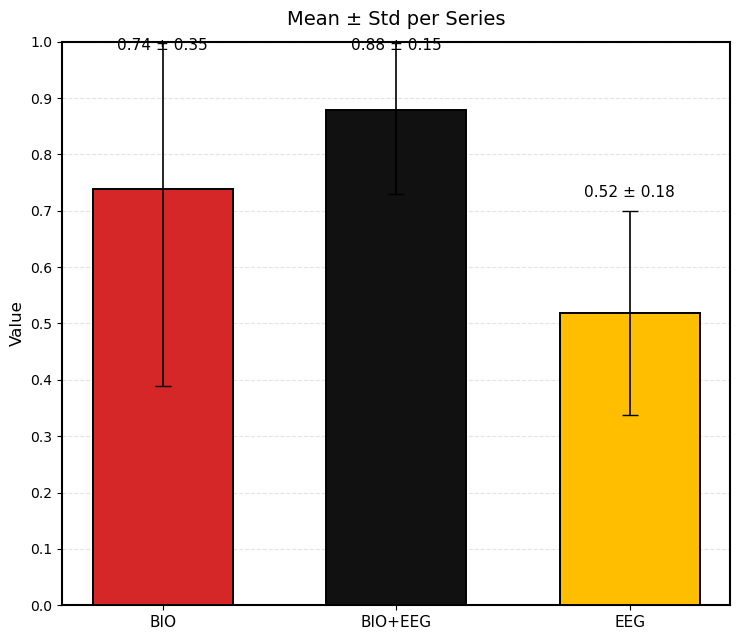

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# assumes BIO, BIO_EEG, EEG are already defined lists
labels = ["BIO", "BIO+EEG", "EEG"]
series = [BIO, BIO_EEG, EEG]

means = [np.mean(s) for s in series]
stds  = [np.std(s, ddof=1) for s in series]  # sample std

x = np.arange(len(labels))
colors = ["#d62728", "#111111", "#ffbf00"]  # red, black, gold

fig, ax = plt.subplots(figsize=(7.5, 6.5))
ax.set_facecolor("white")
ax.set_axisbelow(True)

# dynamic y-top (capped at 1.0)
y_top = min(1.0, max(m + s for m, s in zip(means, stds)) + 0.08)

bars = ax.bar(
    x, means, yerr=stds, width=0.6,
    color=colors, edgecolor="black", linewidth=1.4,
    error_kw=dict(ecolor="black", elinewidth=1.2, capsize=6),  # <-- pass errorbar styling here
    zorder=3
)

# y-axis formatting (0.1 resolution)
ax.set_ylim(0, y_top)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Mean ± Std per Series", fontsize=14, pad=12)

ax.grid(axis="y", linestyle="--", alpha=0.35)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

for i, (m, s) in enumerate(zip(means, stds)):
    y_text = min(y_top - 0.02, m + s + 0.02)
    ax.text(i, y_text, f"{m:.2f} ± {s:.2f}",
            ha="center", va="bottom", fontsize=11, fontweight="medium")

plt.tight_layout()
plt.savefig("mean_std_bar_matplotlib_beautiful.png", dpi=200)
plt.show()


### 14 fold cross validation

In [45]:
BIO_EEG = [0.919540, 0.515152, 0.752381, 1.000000, 1.000000, 0.999001, 0.866667, 1.000000, 1.000000, 0.850000, 0.315789, 1.000000, 0.000000, 1.000000]
BIO = [0.08045977011494254, 1.0, 0.8, 0.24489795918367352, 1.0, 0.038461538461538436, 0.0, 1.0, 1.0, 0.85, 0.0, 1.0, 0.0, 0.0]
EEG = [0.5142857142857143,
 0.27037037037037037,
 0.14705882352941177,
 0.6664086687306502,
 0.0,
 0.893028024606972,
 0.75,
 0.603448275862069,
 0.3564839934888768,
 1.0,
 0.07236842105263162,
 0.6269303201506591,
 0.3090909090909091,
 0.6053067993366501]

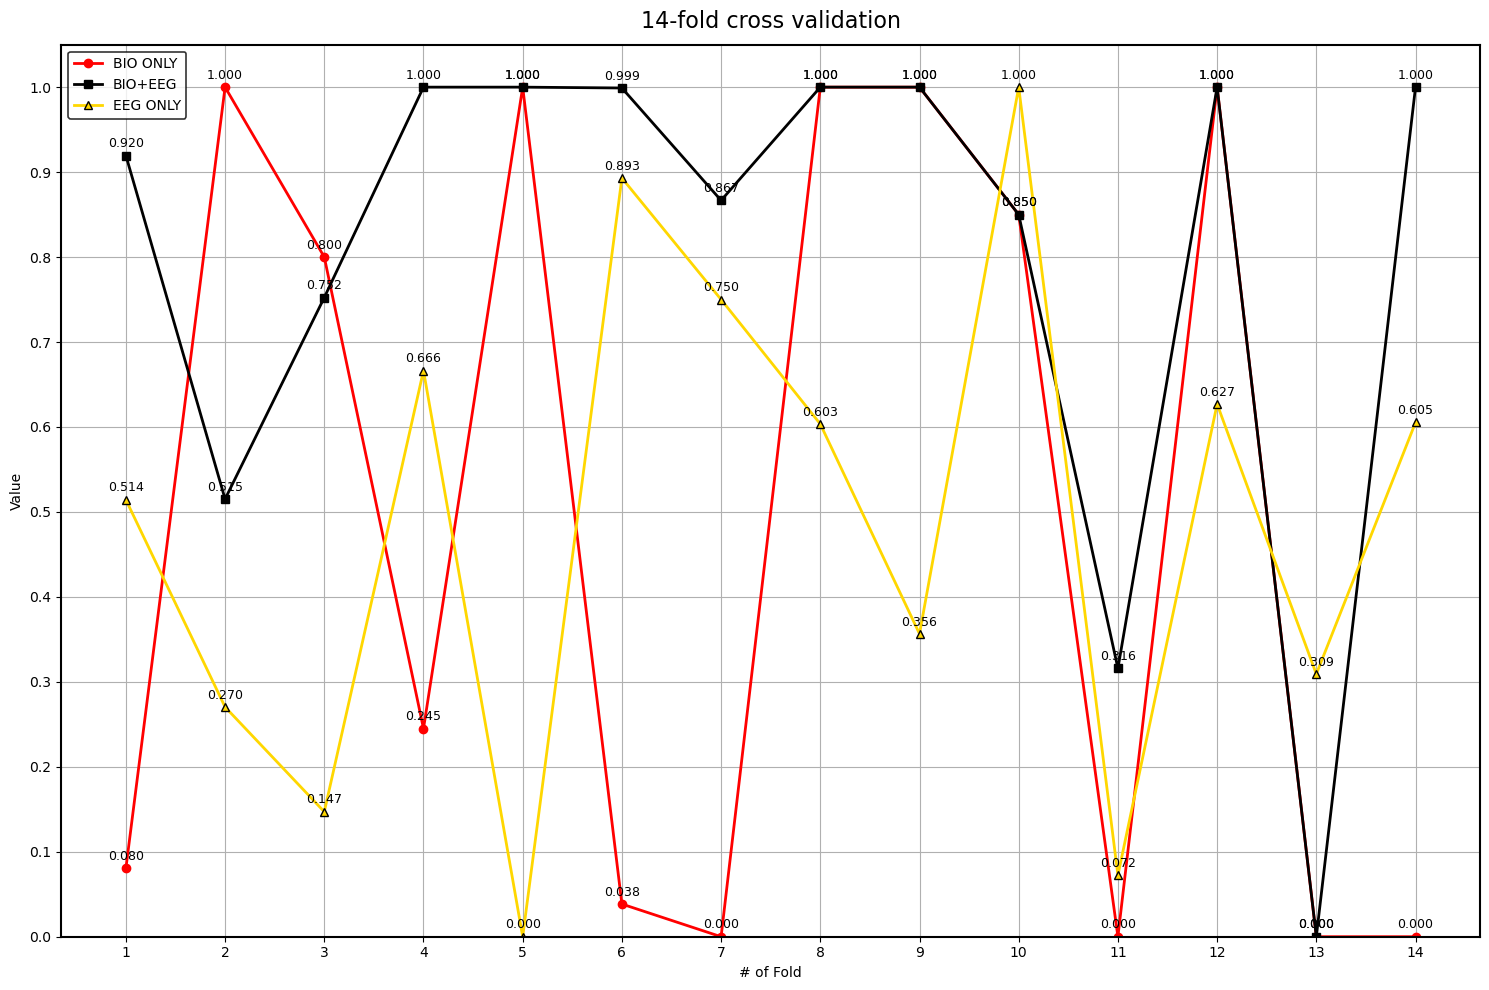

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


folds = np.arange(1, len(BIO) + 1)

plt.figure(figsize=(15, 10))
ax = plt.gca()

# --- plot with matplotlib only ---
# --- plot with specified colors ---
line1, = ax.plot(folds, BIO,      color='red',   marker='o', linewidth=2, label='BIO ONLY',
                  markerfacecolor='red', markeredgecolor='red')
line2, = ax.plot(folds, BIO_EEG,  color='black', marker='s', linewidth=2, label='BIO+EEG',
                  markerfacecolor='black', markeredgecolor='black')
line3, = ax.plot(folds, EEG,      color='gold',  marker='^', linewidth=2, label='EEG ONLY',
                  markerfacecolor='gold', markeredgecolor='black')

# --- annotate each point with its value ---
def annotate_points(x, y):
    for xi, yi in zip(x, y):
        ax.annotate(f"{yi:.3f}", (xi, yi),
                    textcoords="offset points", xytext=(0, 6),
                    ha='center', fontsize=9)

annotate_points(folds, BIO)
annotate_points(folds, BIO_EEG)
annotate_points(folds, EEG)

# --- titles & axes ---
ax.set_title("14-fold cross validation", fontsize=16, pad=12)
ax.set_xlabel("# of Fold")
ax.set_ylabel("Value")

# y-axis: resolution 0.1
ax.set_ylim(0.0, 1.05)
ax.set_yticks(np.arange(0.0, 1.01, 0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# x-axis ticks at each fold
ax.set_xticks(folds)

# outer border in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# legend with black border
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(1.2)

ax.grid(True)
plt.tight_layout()
plt.savefig("fold_series_plot_matplotlib.png", dpi=200)
plt.show()


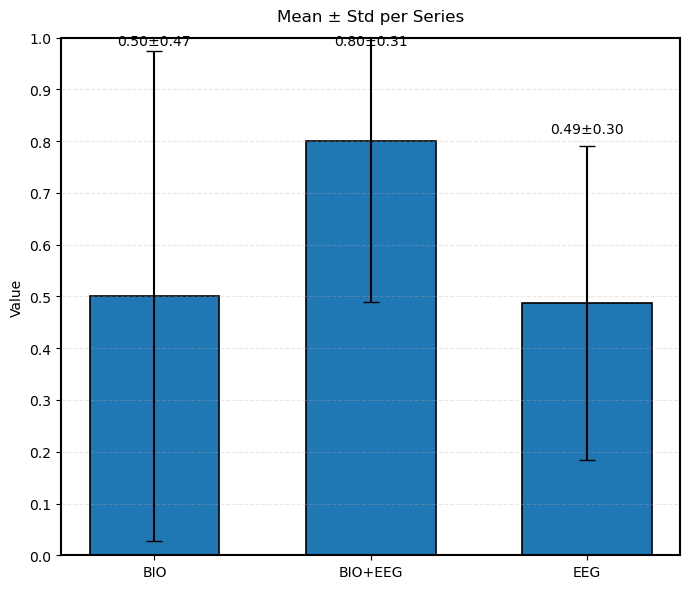

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# assumes BIO, BIO_EEG, EEG are already defined lists
labels = ["BIO", "BIO+EEG", "EEG"]
series = [BIO, BIO_EEG, EEG]

means = [np.mean(s) for s in series]
stds  = [np.std(s, ddof=1) for s in series]  # sample std

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(7, 6))
bars = ax.bar(x, means, yerr=stds, capsize=6, width=0.6,
              edgecolor="black", linewidth=1.2)

# y-axis: 0.1 resolution
ax.set_ylim(0, 1.0)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Value")
ax.set_title("Mean ± Std per Series", pad=12)

# optional: light horizontal grid
ax.grid(axis="y", linestyle="--", alpha=0.3)

# black outer border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# value labels above bars
for i, (m, s) in enumerate(zip(means, stds)):
    y = min(0.98, m + s + 0.02)
    ax.text(i, y, f"{m:.2f}±{s:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("mean_std_bar_matplotlib.png", dpi=200)
plt.show()
